In [64]:
import pandas as pd

# Load the uploaded dataset
file_path = 'clean_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,california,3.90,6.7,962.0,100,1.0,0
1,Admit,florida,3.80,1.4,969.0,97,1.0,4
2,Admit,colorado,3.60,0.9,969.0,97,0.0,2
3,Admit,california,3.88,1.5,967.0,95,1.0,5
4,Admit,california,3.70,1.2,969.0,94,1.0,2


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler
df_normalized = df.copy()

scaler = MinMaxScaler()
df_normalized[['TestScore', 'WritingScore','WorkExp']] = scaler.fit_transform(df_normalized[['TestScore', 'WritingScore','WorkExp']])
df_filtered = df_normalized[df_normalized['Decision'] != 'Waitlist']
df_filtered = df_filtered.drop(index=[12,18], errors='ignore')
df_filtered['Admission'] = df_filtered['Decision'].apply(lambda x: 1 if x == 'Admit' else 0)

X = df_filtered[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel']]
y = df_filtered['Admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Function to calculate metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Collect performance metrics
metrics_log = get_metrics(y_test, y_pred_log)


# Print model performance comparison
print("Model Performance Comparison:")
print(metrics_log)



Model Performance Comparison:
{'Accuracy': 0.9411764705882353, 'Precision': 0.9166666666666666, 'Recall': 1.0, 'F1 Score': 0.9565217391304348}


In [66]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_feature_importance = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)


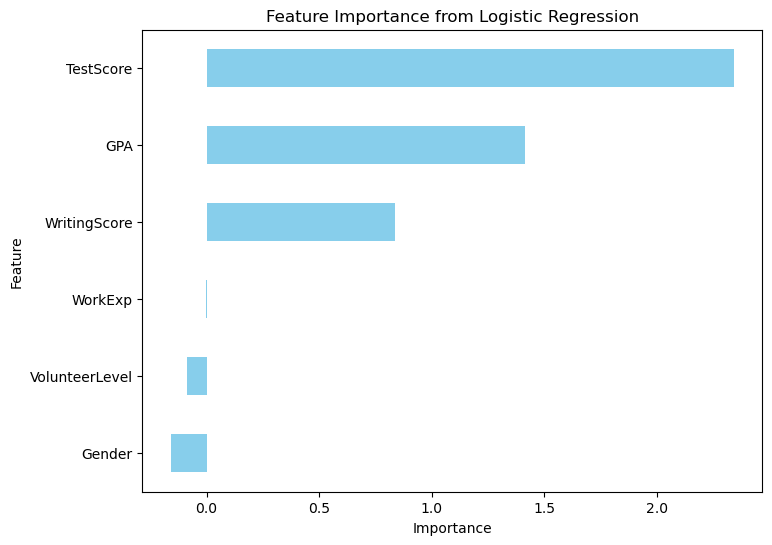

In [67]:
import matplotlib.pyplot as plt

# Visualize feature importance
plt.figure(figsize=(8, 6))
log_feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('viz/Logistic Result.png')
plt.show()


In [68]:
df_filtered

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,Admission
0,Admit,california,3.90,0.728261,0.967890,1.000000,1.0,0,1
1,Admit,florida,3.80,0.152174,1.000000,0.969697,1.0,4,1
2,Admit,colorado,3.60,0.097826,1.000000,0.969697,0.0,2,1
3,Admit,california,3.88,0.163043,0.990826,0.949495,1.0,5,1
4,Admit,california,3.70,0.130435,1.000000,0.939394,1.0,2,1
5,Admit,florida,3.90,0.510870,0.963303,0.929293,1.0,1,1
6,Admit,california,3.70,0.152174,0.986239,0.939394,1.0,0,1
7,Admit,florida,3.93,0.086957,1.000000,0.989899,1.0,4,1
8,Admit,colorado,3.60,0.130435,0.990826,0.939394,1.0,2,1
9,Admit,california,3.69,0.347826,0.990826,0.929293,0.0,3,1


In [69]:
# Predict for waitlist students using the updated logistic regression model
waitlist_df = df_normalized[df_normalized['Decision'] == 'Waitlist']
X_waitlist = waitlist_df[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel']]
waitlist_predictions = log_model.predict(X_waitlist)
waitlist_df['Predicted_Admission'] = waitlist_predictions

# Output waitlist predictions
waitlist_df[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel', 'Predicted_Admission']]


/var/folders/_c/cbt8xxhx1q18s6z108pfn5d00000gn/T/ipykernel_98307/2960046581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitlist_df['Predicted_Admission'] = waitlist_predictions


,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,Predicted_Admission
57,3.40,0.206522,0.495413,0.878788,0.0,4,0
58,3.45,0.510870,0.532110,0.707071,0.0,3,0
59,3.50,0.184783,0.541284,0.727273,0.0,2,0
60,3.55,0.239130,0.527523,0.737374,1.0,1,0
61,3.41,0.130435,0.536697,0.848485,0.0,0,0
62,3.53,0.184783,0.541284,0.868687,1.0,2,0
63,3.50,0.380435,0.541284,0.828283,0.0,4,0
64,3.39,0.195652,0.527523,0.818182,1.0,5,0
65,3.52,0.293478,0.477064,0.868687,1.0,3,0
66,3.49,0.141304,0.527523,0.858586,0.0,5,0
